In [1]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [2]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-03-11 16:16:03--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   133MB/s    in 0.8s    

2024-03-11 16:16:04 (133 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    - ch

In [3]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT
import sys

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-4avbl55o
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-4avbl55o
  Resolved https://github.com/ersilia-os/ersilia.git to commit ab5dd7e662c75337a853acf3157487b7075d0f29
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 62 kB 742 kB/s 
     |████████████████████████████████| 97 kB 3.5 MB/s 
     |████████████████████████████████| 148 kB 10.1 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 4.3 MB 17.3 MB/s 
     |████████████████████████████████| 9.9 MB 63.4 MB/s 
     |████████████████████████████████| 670 kB 62.5 MB/s 
     |████████████████████████████████| 421 kB 69.7 MB/s 
     |████████████████████████████████| 139 kB 82.6 MB/s 
     |████████████████████████████████| 58 kB 7.9 MB/s 
     |████████

In [4]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [5]:
import sys

In [6]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [7]:
## Mount google drive
from google.colab import drive

In [8]:
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
# specifying my input folder

input_folder = "/content/drive/MyDrive/Ersilia"  # @param {type:"string"}

In [10]:
# specifying my output folder

output_folder = "/content/drive/MyDrive/Ersilia"  # @param {type:"string"}

Download and run the selected model from Ersilia and make sure it works

In [11]:
model_name = "eos6oli"

Fetching the model

In [12]:
# Fetching the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-pui0_gwc
Solving environment: / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2023.12.12 |       h06a4308_0     

Serving the model

In [13]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:43069
   PID: 4178
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


Running Predictions for soltranet data found in the github repo

In [14]:
# specify the name of my input csv file

input_filename = "llinas2020_raw"

In [15]:
# specify the SMILES column name
smiles_column = "smiles"

In [16]:
# Extracting SMILES to a list
import pandas as pd

In [17]:
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 132 SMILES


In [18]:
 #Running predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 15.39 seconds


In [19]:
# Check the results

print(output.head())

                           key  \
0  BZKPWHYZMXOIDC-UHFFFAOYSA-N   
1  BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
2  ARHWPKZXBHOEEE-UHFFFAOYSA-N   
3  JBDGDEWWOUBZPM-XYPYZODXSA-N   
4  CEUORZQYGODEFX-UHFFFAOYSA-N   

                                               input  solubility  
0                     CC(NC1=NN=C(S1)[S](N)(=O)=O)=O      -1.242  
1                         C(C)(=O)OC1=CC=CC=C1C(=O)O      -1.858  
2                           C=CCOc1ccc(cc1Cl)CC(=O)O      -3.120  
3           O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2      -2.199  
4  O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...      -5.205  


In [20]:
#Save the results in Google Drive


output.to_csv("/content/drive/MyDrive/Ersilia/ErsiliaSoltranet.csv", index=False)

In [21]:

ErsiliaSoltranet=pd.read_csv("/content/drive/MyDrive/Ersilia/ErsiliaSoltranet.csv")
ErsiliaSoltranet.head()

,key,input,solubility
0,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O,-1.242
1,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,C(C)(=O)OC1=CC=CC=C1C(=O)O,-1.858
2,ARHWPKZXBHOEEE-UHFFFAOYSA-N,C=CCOc1ccc(cc1Cl)CC(=O)O,-3.120
3,JBDGDEWWOUBZPM-XYPYZODXSA-N,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2,-2.199
4,CEUORZQYGODEFX-UHFFFAOYSA-N,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...,-5.205


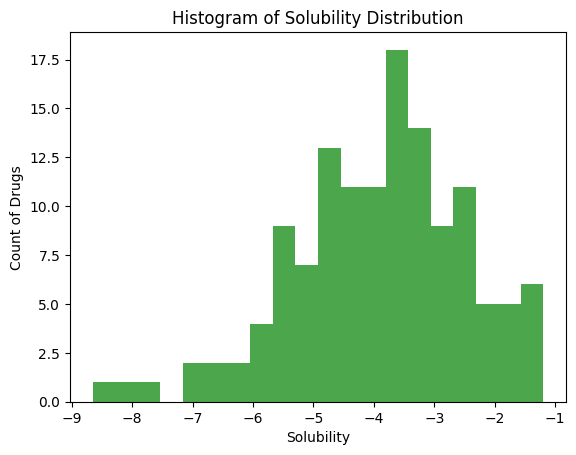

In [23]:
#creating an histogram to compare
import matplotlib.pyplot as plt

solubility_values = ErsiliaSoltranet ['solubility']

# Create a histogram
plt.hist(solubility_values, bins=20, color='green', alpha=0.7)

# Add labels and title
plt.xlabel('Solubility')
plt.ylabel('Count of Drugs')
plt.title('Histogram of Solubility Distribution')

plt.savefig('/content/drive/MyDrive/Ersilia/ErsiliaPrediction_plot.png')
# Show the plot
plt.show()